# Neural networks

In [1]:
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## The house prices dataset

Based on [this](https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-1a-introduction-to-neural-networks-d7b16ebf6b99) and [this](https://medium.com/intuitive-deep-learning/intuitive-deep-learning-part-1b-introduction-to-neural-networks-8565d97ddd2d). 

Let us build a neural network that predicts whether the house price is below or above the median value. 

In [2]:
df = pd.read_csv('../../datasets/housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Now that we have looked at it, let's convert this dataframe into an array.

In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

Now, we split the dataset into our input features and the label we wish to predict.

In [6]:
X = dataset[:,0:10] #take all rows and all columns from 0 up to and not including 10
Y = dataset[:,10] #take all rows and column number 10

## Preparing the data

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

## Configuring the network architecture 

We will be using the Sequential model, which means that we merely need to describe our layers in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [10]:
model = Sequential([
    Dense(30, activation='relu', input_shape=(10,)),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid'),
])

## Configuring the training process

Before we start our training, we have to configure the model by
- Telling it what algorithm we want to use for the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics we want to track apart from the loss function (we want to track accuracy as well):

In [11]:
sgd = optimizers.SGD(lr=0.02) #, decay=1e-6, momentum=0.9, nesterov=True)

In [12]:
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Training the model

We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which wenables us to observe the progress of the learning process.

In [13]:
history = model.fit(X_train, Y_train, 
          batch_size=32, epochs=100, verbose=0,
          validation_data=(X_test, Y_test))

# Testing the model

In [14]:
print("Accuracy on house prices:",model.evaluate(X_test, Y_test)[1])

438/438 [==============================] - 0s 34us/step
Accuracy on house prices: 0.8858447670936584


We can visualize the learning process like this:

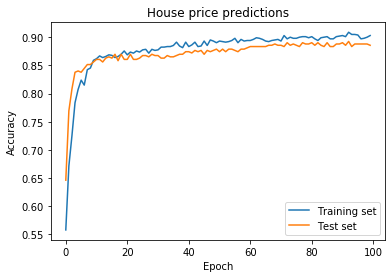

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('House price predictions')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='lower right')
plt.show()

## The pima dataset

Based on [this](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [16]:
pima = pd.read_csv('../../datasets/diabetes.csv') # Missing data!! See 0s under Insulin and SkinThickness
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
X = pima[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] # Features
y = pima['Outcome'] # Targets

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [20]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

## Defining the model

In [21]:
model = Sequential([
    Dense(100, activation='relu', input_dim=8),
    Dense(80, activation='relu'), 
    Dense(1, activation='sigmoid')
])

In [22]:
sgd = optimizers.SGD(lr=0.02, decay=2e-4) #, momentum=0.9, nesterov=True)

In [23]:
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
hist = model.fit(X_train, y_train, 
          batch_size=10, epochs=150, verbose=1,
          validation_data=(X_test, y_test))

Train on 537 samples, validate on 231 samples
Epoch 1/150
537/537 [==============================] - 0s 320us/step - loss: 0.6620 - accuracy: 0.6648 - val_loss: 0.6605 - val_accuracy: 0.6364
Epoch 2/150
537/537 [==============================] - 0s 151us/step - loss: 0.6441 - accuracy: 0.6574 - val_loss: 0.6561 - val_accuracy: 0.6364
Epoch 3/150
537/537 [==============================] - 0s 156us/step - loss: 0.6387 - accuracy: 0.6574 - val_loss: 0.6515 - val_accuracy: 0.6364
Epoch 4/150
537/537 [==============================] - 0s 158us/step - loss: 0.6336 - accuracy: 0.6574 - val_loss: 0.6475 - val_accuracy: 0.6364
Epoch 5/150
537/537 [==============================] - 0s 162us/step - loss: 0.6274 - accuracy: 0.6574 - val_loss: 0.6439 - val_accuracy: 0.6364
Epoch 6/150
537/537 [==============================] - 0s 156us/step - loss: 0.6236 - accuracy: 0.6574 - val_loss: 0.6372 - val_accuracy: 0.6364
Epoch 7/150
537/537 [==============================] - 0s 198us/step - loss: 0.6162 

Epoch 57/150
537/537 [==============================] - 0s 151us/step - loss: 0.4610 - accuracy: 0.7765 - val_loss: 0.5129 - val_accuracy: 0.7532
Epoch 58/150
537/537 [==============================] - 0s 158us/step - loss: 0.4609 - accuracy: 0.7784 - val_loss: 0.5029 - val_accuracy: 0.7749
Epoch 59/150
537/537 [==============================] - 0s 216us/step - loss: 0.4593 - accuracy: 0.7877 - val_loss: 0.5050 - val_accuracy: 0.7749
Epoch 60/150
537/537 [==============================] - 0s 151us/step - loss: 0.4590 - accuracy: 0.7747 - val_loss: 0.5054 - val_accuracy: 0.7662
Epoch 61/150
537/537 [==============================] - 0s 197us/step - loss: 0.4576 - accuracy: 0.7821 - val_loss: 0.5022 - val_accuracy: 0.7749
Epoch 62/150
537/537 [==============================] - 0s 255us/step - loss: 0.4533 - accuracy: 0.7803 - val_loss: 0.5199 - val_accuracy: 0.7403
Epoch 63/150
537/537 [==============================] - 0s 268us/step - loss: 0.4574 - accuracy: 0.7840 - val_loss: 0.5013 -

537/537 [==============================] - 0s 160us/step - loss: 0.4471 - accuracy: 0.7952 - val_loss: 0.4944 - val_accuracy: 0.7749
Epoch 114/150
537/537 [==============================] - 0s 160us/step - loss: 0.4464 - accuracy: 0.7728 - val_loss: 0.4929 - val_accuracy: 0.7792
Epoch 115/150
537/537 [==============================] - 0s 162us/step - loss: 0.4467 - accuracy: 0.7840 - val_loss: 0.4988 - val_accuracy: 0.7706
Epoch 116/150
537/537 [==============================] - 0s 192us/step - loss: 0.4456 - accuracy: 0.7877 - val_loss: 0.5043 - val_accuracy: 0.7792
Epoch 117/150
537/537 [==============================] - 0s 155us/step - loss: 0.4462 - accuracy: 0.7821 - val_loss: 0.4937 - val_accuracy: 0.7835
Epoch 118/150
537/537 [==============================] - 0s 166us/step - loss: 0.4462 - accuracy: 0.7821 - val_loss: 0.4975 - val_accuracy: 0.7792
Epoch 119/150
537/537 [==============================] - 0s 182us/step - loss: 0.4444 - accuracy: 0.7877 - val_loss: 0.4971 - val_ac

In [25]:
print("Accuracy on pima:",model.evaluate(X_test, y_test)[1])

231/231 [==============================] - 0s 61us/step
Accuracy on pima: 0.7792207598686218


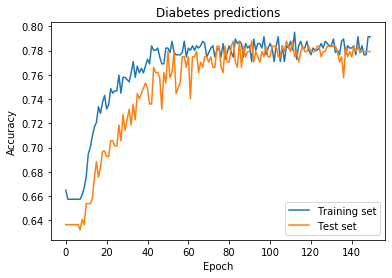

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Diabetes predictions')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='lower right')
plt.show()